# Set up

In [1]:
# update path with data dir
import sys
sys.path.append('../../data/')

In [126]:
import player_data as player
import pandas as pd
# import pandas_profiling
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import numpy as np

# Getting data

In [3]:
file_name = '../csvs/element_gameweek_2019-05-14.csv'

In [4]:
element_gameweek_df = pd.read_csv(file_name, index_col=0)

In [5]:
player.add_home_categorical_variable(element_gameweek_df)

In [6]:
element_gameweek_df.head()

,row_id,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,...,team_a,team_a_difficulty,team_h,team_h_difficulty,element_type,team,web_name,safe_web_name,own_team,opposition_team
0,0,0,42,0,0,0,24,0,2,31,...,13,4,1,4,1,1,Cech,cech,1,13
1,1,0,35,0,0,0,26,0,1,25,...,1,4,6,4,1,1,Cech,cech,1,6
2,2,0,24,0,0,0,17,0,0,20,...,19,4,1,3,1,1,Cech,cech,1,19
3,3,0,38,0,0,0,8,0,0,24,...,1,2,5,4,1,1,Cech,cech,1,5
4,4,0,33,0,0,0,13,0,2,23,...,1,3,15,4,1,1,Cech,cech,1,15


# Analysis

In [7]:
# pandas_profiling.ProfileReport(element_gameweek_df)

In [96]:
element_df = element_gameweek_df.groupby('element', as_index=False).mean()
infrequent_players = player_median_df[player_median_df['minutes'] < 60]['element']
frequent_element_gameweek_df = element_gameweek_df[~element_gameweek_df['element'].isin(infrequent_players)]

In [97]:
element_gameweek_df[~element_gameweek_df['element'].isin(infrequent_players)]['safe_web_name'].drop_duplicates()

38                  leno
152              monreal
228              mustafi
266            kolasinac
380             sokratis
570                xhaka
760            lacazette
798           aubameyang
836             torreira
874            guendouzi
1100             begovic
1214          steve cook
1290          adam smith
1366                 ake
1670              fraser
1746              brooks
1784              wilson
1860                king
2050               lerma
2088              mepham
2133             travers
2136                ryan
2174                dunk
2212               duffy
2288                bong
2478            stephens
2554               march
2592               gross
2630             propper
2706              murray
              ...       
18566            holebas
18718           mariappa
18756       kiko femenia
18984             capoue
19022           doucoure
19060            pereyra
19098             hughes
19136           deulofeu
19212             deeney


In [98]:
cols = element_gameweek_df.columns
cols = [i for i in cols if i not in
 [
     'row_id',
     'creativity',
     'ea_index',
     'element',
     'event',
     'fixture',
     'ict_index',
     'id',
     'influence',
     'kickoff_time',
     'kickoff_time_formatted',
     'loaned_in',
     'loaned_out',
     'opponent_team',
     'round',
     'selected',
     'threat',
     'transfers_balance',
     'transfers_in',
     'transfers_out',
     'team',
     'team_a',
     'team_h',
     'opposition_team',
     'own_team',
     'element_type',
     'web_name',
     'safe_web_name'
 ]
]

In [99]:
element_gameweek_df[cols].corrwith(element_gameweek_df['total_points']).sort_values(ascending=False)

total_points                       1.000000
bps                                0.907416
bonus                              0.758815
goals_scored                       0.670453
minutes                            0.623484
clean_sheets                       0.577167
attempted_passes                   0.536111
completed_passes                   0.504812
recoveries                         0.494947
assists                            0.453030
key_passes                         0.423821
winning_goals                      0.417143
tackled                            0.374546
dribbles                           0.335578
clearances_blocks_interceptions    0.330171
big_chances_created                0.319337
value                              0.314079
target_missed                      0.297822
fouls                              0.291260
tackles                            0.249708
open_play_crosses                  0.214354
offside                            0.195107
big_chances_missed              

In [100]:
element_gameweek_df['total_points'].describe()

count    21790.000000
mean         1.424094
std          2.563758
min         -4.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         23.000000
Name: total_points, dtype: float64

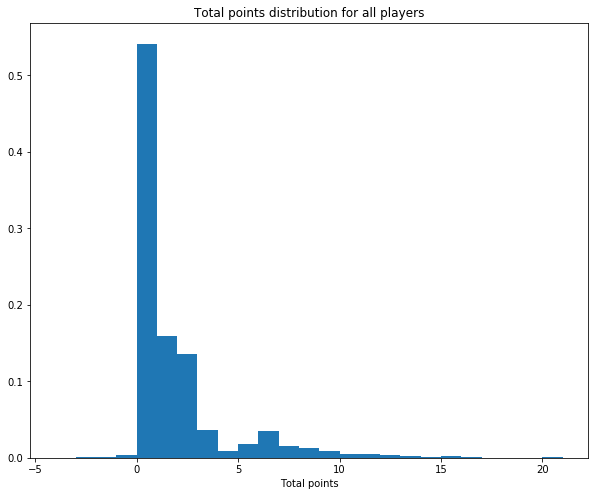

In [101]:
plt.figure(figsize=(10, 8))
plt.hist(element_gameweek_df['total_points'], bins=range(-4, 22), density=True)
plt.title('Total points distribution for all players')
plt.xlabel('Total points')
plt.show()

In [102]:
frequent_element_gameweek_df[cols].corrwith(element_gameweek_df['total_points']).sort_values(ascending=False)

total_points                       1.000000
bps                                0.878034
bonus                              0.781013
goals_scored                       0.680624
clean_sheets                       0.517256
minutes                            0.428239
winning_goals                      0.427829
assists                            0.425304
attempted_passes                   0.306899
key_passes                         0.293624
completed_passes                   0.277351
big_chances_created                0.272737
recoveries                         0.247457
value                              0.244609
dribbles                           0.224044
tackled                            0.223629
target_missed                      0.181686
big_chances_missed                 0.132757
offside                            0.130966
open_play_crosses                  0.111905
clearances_blocks_interceptions    0.111144
saves                              0.104690
fouls                           

In [103]:
frequent_element_gameweek_df['total_points'].describe()

count    7893.000000
mean        2.783859
std         3.193801
min        -4.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        23.000000
Name: total_points, dtype: float64

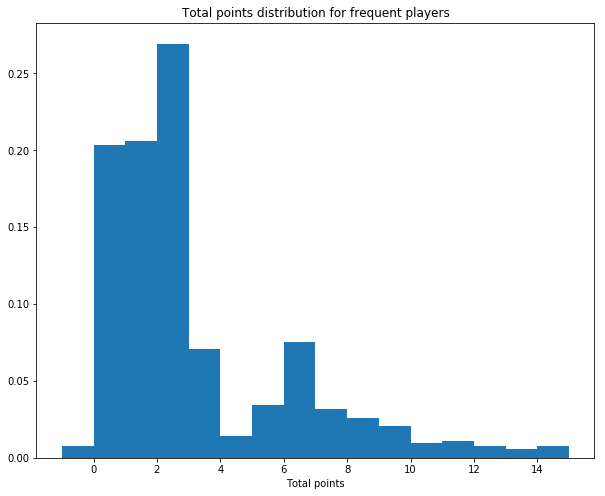

In [104]:
plt.figure(figsize=(10, 8))
plt.hist(frequent_element_gameweek_df['total_points'], bins=range(-1, 16), density=True)
plt.title('Total points distribution for frequent players')
plt.xlabel('Total points')
plt.show()

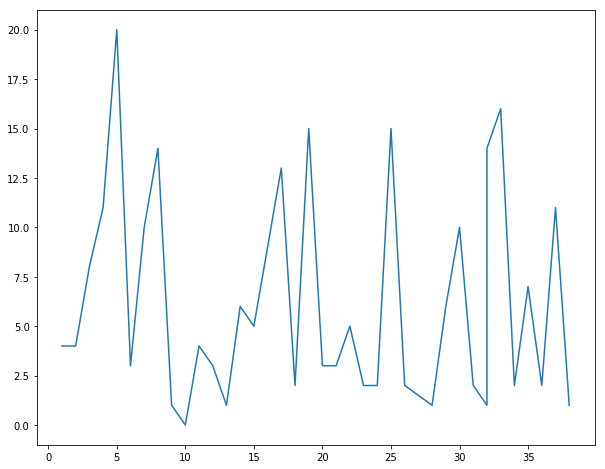

In [105]:
plt.figure(figsize=(10, 8))
plt.plot(element_gameweek_df[element_gameweek_df['element'] == 122]['event'], element_gameweek_df[element_gameweek_df['element'] == 122]['total_points'])
plt.show()

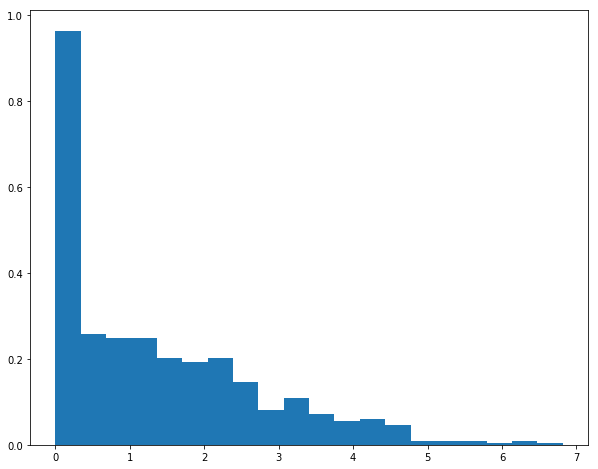

In [106]:
plt.figure(figsize=(10, 8))
plt.hist(element_df['total_points'], bins=20, density=True)
plt.show()

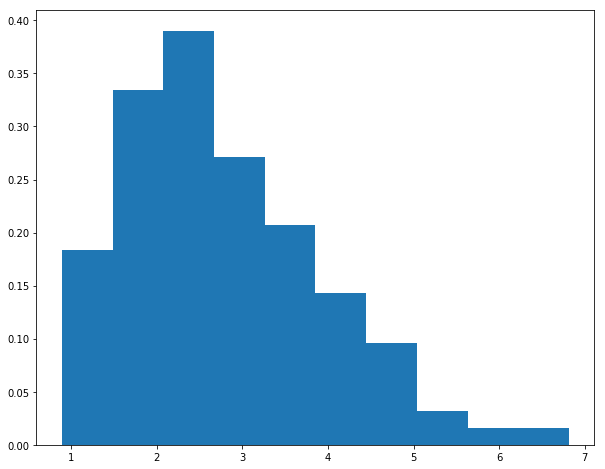

In [107]:
plt.figure(figsize=(10, 8))
plt.hist(frequent_element_df['total_points'], density=True)
plt.show()

In [112]:
frequent_element_df['points_per_value'] = \
frequent_element_df['total_points'] / frequent_element_df['value']
frequent_element_df[
    ['safe_web_name', 'total_points', 'value', 'points_per_value']
].sort_values('points_per_value', ascending=False)

,safe_web_name,total_points,value,points_per_value
188,travers,4.500000,40.000000,0.112500
4,alexander-arnold,4.868421,52.526316,0.092685
60,etheridge,4.052632,45.921053,0.088252
192,van dijk,5.473684,62.815789,0.087139
159,robertson,5.605263,65.447368,0.085645
147,pickford,4.236842,49.526316,0.085547
15,babel,4.687500,55.062500,0.085131
48,digne,4.157895,50.657895,0.082078
62,fabianski,3.763158,46.421053,0.081066
5,alisson,4.631579,57.973684,0.079891


In [113]:
frequent_element_df['points_per_value'].describe()

count    212.000000
mean       0.050150
std        0.015649
min        0.019080
25%        0.038800
50%        0.049171
75%        0.060246
max        0.112500
Name: points_per_value, dtype: float64

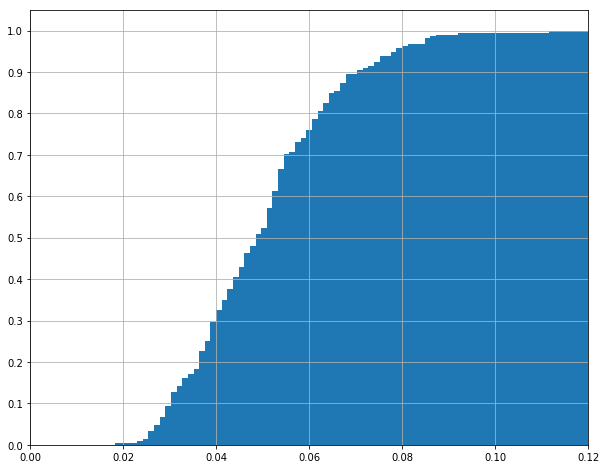

In [133]:
plt.figure(figsize=(10, 8))
plt.hist(frequent_element_df['points_per_value'], bins=np.linspace(0.0, 0.12, 100), density=True, cumulative=True)
plt.axes().yaxis.set_major_locator(MultipleLocator(0.1))
plt.grid(which='major')
plt.xlim((0, 0.12))
plt.show()

In [143]:
value_element_df = frequent_element_df.copy()
value_element_df = value_element_df[value_element_df['points_per_value'] > 0.045]

value_element_df[['safe_web_name', 'total_points', 'value', 'points_per_value']]

,safe_web_name,total_points,value,points_per_value
1,aguero,5.289474,114.526316,0.046186
2,ake,3.157895,50.210526,0.062893
3,alderweireld,2.815789,59.578947,0.047261
4,alexander-arnold,4.868421,52.526316,0.092685
5,alisson,4.631579,57.973684,0.079891
8,alonso,4.236842,66.763158,0.063461
10,antonio,3.105263,68.184211,0.045542
13,aubameyang,5.394737,110.342105,0.048891
14,azpilicueta,4.157895,63.526316,0.065452
15,babel,4.687500,55.062500,0.085131


In [139]:
frequent_element_df[
    frequent_element_df['safe_web_name'].isin(['aguero', 'salah', 'sterling'])
][['safe_web_name', 'total_points', 'value', 'points_per_value']]

,safe_web_name,total_points,value,points_per_value
1,aguero,5.289474,114.526316,0.046186
165,salah,6.815789,131.815789,0.051707
180,sterling,6.157895,113.289474,0.054355
